Fan Speed: 50.0


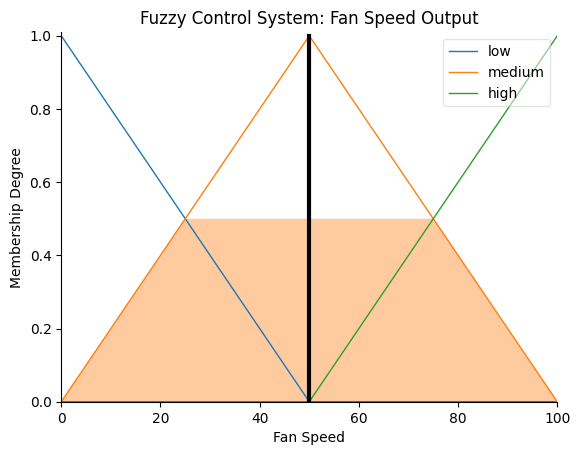

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the universe of discourse
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
desired_temp = ctrl.Antecedent(np.arange(0, 41, 1), 'desired_temp')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])

# Define fuzzy membership functions for desired temperature
desired_temp['cold'] = fuzz.trimf(desired_temp.universe, [0, 0, 20])
desired_temp['warm'] = fuzz.trimf(desired_temp.universe, [15, 25, 35])
desired_temp['hot'] = fuzz.trimf(desired_temp.universe, [30, 40, 40])

# Define fuzzy membership functions for fan speed
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define the rules
rule1 = ctrl.Rule(temperature['cold'] & desired_temp['warm'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'] & desired_temp['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'] & desired_temp['cold'], fan_speed['high'])
rule4 = ctrl.Rule(temperature['warm'] & desired_temp['hot'], fan_speed['high'])

# Create a control system
fan_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
fan_control_sim = ctrl.ControlSystemSimulation(fan_control)

# Simulate the system
current_temp = 20  # Current temperature
desired_temp_value = 30  # Desired temperature

# Input values
fan_control_sim.input['temperature'] = current_temp
fan_control_sim.input['desired_temp'] = desired_temp_value

# Compute the output
fan_control_sim.compute()

# Output result
print(f'Fan Speed: {fan_control_sim.output["fan_speed"]}')
fan_speed.view(sim=fan_control_sim)

# Plot the output
plt.title('Fuzzy Control System: Fan Speed Output')
plt.xlabel('Fan Speed')
plt.ylabel('Membership Degree')
plt.show()
